<center><h1> THEME 2 - Calculs avec Numpy </h1></center>

## Objectif

- Effectuer des calculs vectoriels et matriciels avec le module Numpy
- Utiliser diverses fonctions disponibles pour résoudre des problèmes en GCH

## Référence

- [Documentation Numpy](https://numpy.org/doc/stable/reference/)

---

<center><h2> Exemple 1 - Loi d'Arrhenius </h2></center>

### Contexte
En cinétique chimique, la loi d'Arrhenius permet de décrire la variation de la vitesse d'une réaction chimique en fonction de la température en suvant la relation suivante: 

$$
\begin{aligned}
k=A \cdot \mathrm{e}^{\frac{-E_{A}}{R T}}
\end{aligned}
$$

- $k$, coefficient de vitesse de la réaction
- $A$, facteur pré-exponentiel
- $T$, température en K
- $R$, constante des gazs parfaits
- $E_{A}$, énergie d'activation


### Code

On commence par importer la librairie numpy et d'initialiser les constantes du problème

In [35]:
import numpy as np
import matplotlib.pyplot as plt # Sera vu plus en détail dans le thème 3

A = 9.0 #(1/s)
R = 8.314 #(kPa.L/mol.K)
E_A = 200 #(kJ/mol)

vec_T = np.array([300, 400, 500, 600, 700, 800, 900, 1000])	# Creation manuelle du vecteur de températures

Pour discretiser T automatiquement, on a le choix entre:
- `np.arange(debut, fin, pas)`: génére les points si l'on veut un $\delta T$ spécifique
- `np.linspace(debut, fin, nb de points)`: génère le nombre de points voulus espacés linéairement

Ces fonctions retournent un vecteur des valeurs. 

In [38]:
vec_T = np.linspace(100,400,101) # Discrétisation linéaire de 100 points entre 100 et 400 K

print(vec_T[10]) # Affiche le 11e élément de T puisque l'indexation en python commence à 0
print(vec_T[:10]) # Affiche les 10 premiers éléments de T
print(vec_T[91:]) # Affiche les 10 derniers éléments de T
print(vec_T[95:-1]) # Affiche les valeurs entre l'indice 95 et le dernier élement du vecteur tout en excluant ce dernier
print(vec_T[0:20:5]) # Affiche les éléments de T à indices multiples de 5 entre 0 et 20

130.0
[100. 103. 106. 109. 112. 115. 118. 121. 124. 127.]
[373. 376. 379. 382. 385. 388. 391. 394. 397. 400.]
[385. 388. 391. 394. 397.]
[100. 115. 130. 145.]


Pour calculer les valeurs de $k$ à chacunes de ces températures, plutot que d'utiliser une boucle `for` pour passer à travers les valeurs de T, on peut tout simplement effectuer les opérations directement avec le vecteur T. 

- Un vecteur multiplié, divisé ou élevé à la puissance par un scalaire va effectuer l'opération sur chacun de ses éléments. 
- 2 vecteurs peuvent subir toutes les opérations mathématiques entre eux tant que leurs dimensions sont égales. 

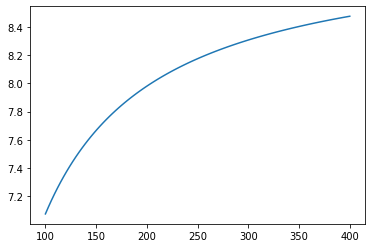

101


In [39]:
vec_k = A*np.exp(-E_A/(R*vec_T)) # np.exp retourne la valeur de l'exponentielle

plt.plot(vec_T, vec_k)
plt.show()

# Puisque le calcul est effectué sur 101 points, le vecteur k contient 101 éléments
print(vec_k.size) # k.size ou len(k) retourne le nombre d'élements du vecteur


Les expressions booléennes de numpy permettent d'exprimer des conditions qui vont être évaluées pour chaque élément du vecteur et retourner un `True` ou `False` pour chaque valeur. 

In [33]:
np.random.seed(0)
vec_k_rand = np.random.choice(vec_k,10) # Choisit 10 éléments aléatoirement du vecteur k

print(vec_k_rand)
print(vec_k_rand > 8.0) # Vecteur booléen qui retourne True pour les éléments de k supérieurs à 8.0 et vice versa
print(~(vec_k_rand < 8.3)) # ~ inverse le booléen
print((vec_k_rand > 8.0) & (vec_k_rand < 8.3)) # & = ET, | = OU
print(vec_k_rand[(vec_k_rand < 8.3)]) # Retourne un vecteur des valeurs de k inférieures à 8.3
print((vec_k_rand < 8.3).nonzero()[0]) # Retourne un vecteur des indices des valeurs de k inférieures à 8.3



[8.11355195 8.14503012 8.28827336 8.30871484 8.30871484 7.44698129
 8.40054644 7.76512787 8.01705901 8.41981609]
[ True  True  True  True  True False  True False  True  True]
[False False False  True  True False  True False False  True]
[ True  True  True False False False False False  True False]
[8.11355195 8.14503012 8.28827336 7.44698129 7.76512787 8.01705901]
[0 1 2 5 7 8]


### Astuces
- Quand on utilise des vecteurs, il est important de faire attention que les unités sont consistantes, c'est à dire éviter de multiplier un vecteur d'entiers par un vecteur de décimaux.
- Il est courant d'avoir l'erreur: `IndexError` au début, cela veut très souvent dire que le vecteur a été indexé avec une valeur plus grande que sa taille. 

---

<center><h2> Exemple 2 - Interpolation Polynomiale</h2></center>

### Contexte
Lorsque l'on va au laboratoire pour déterminer les propriétés d’un matériau ou la vitesse d’une réaction, nous nous retrouvons avec des données discrètes, c’est à dire des couples de point $xi$ auquel nous associons une mesure (que nous appellerons fonction) $f(xi)$. Le but de l’interpolation sera de trouver un moyen d’évaluer $f(x)$ pour $x \neq xi$. 

L'une de ces méthodes d'interpolation est l'interpolation polynomiale, qui consiste à construire un polynome de degré $n$ si l'on a $n-1$ points de référence. 

$$
\begin{aligned}
p_{n}(x)=a_{0}+a_{1} x+a_{2} x^{2}+a_{3} x^{3}+\ldots+a_{n} x^{n}
\end{aligned}
$$

On trouve les coefficients $a_{n}$ en résolvant le système $Aa = f$ où $A$ est la matrice de Vandermonde:

$$
\begin{align*}
\left[\begin{array}{ccccc}
1 & x_{0} & x_{0}^{2} & \cdots & x_{0}^{n} \\
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{n} \\
1 & x_{2} & x_{2}^{2} & \cdots & \vdots \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n} & x_{n}^{2} & \cdots & x_{n}^{n}
\end{array}\right]\left[\begin{array}{c}
a_{0} \\
a_{1} \\
a_{2} \\
\vdots \\
a_{n}
\end{array}\right]=\left[\begin{array}{c}
f\left(x_{0}\right) \\
f\left(x_{1}\right) \\
f\left(x_{2}\right) \\
\vdots \\
f\left(x_{n}\right)
\end{array}\right]
\end{align*}
$$

### Code

Dans Numpy, les matrices sont représentées par un vecteur qui contient plusieurs vecteurs qui font office de lignes, autrement dit, un vecteur 2D. L'indexation des matrices dans Numpy est basée sur les lignes, cela veut dire que l'indexation se fait par `[ligne, colonne]`. Sinon, l'indexation fonctionne de la même façon que les vecteurs.  

In [41]:
mat_A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(mat_A)
print(mat_A[1,1]) # Affiche la valeur de la 2ème ligne et de la 2ème colonne
print(mat_A[1:,1]) # Affiche la 2ème colonne à partir de la 2ème ligne
print(mat_A[2,:]) # Affiche la 3ème ligne

[[1 2 3]
 [4 5 6]
 [7 8 9]]
5
[5 8]
[7 8 9]


Pour cet exemple, la fonction $\frac{1}{1+25x^2}$ sera interpolée à partir de 5 points, cela veut dire que le polynome d'interpolation sera de degré 4.

In [52]:
def fn(vec):
    return 1/(1+25*vec**2)

vec_xi = np.linspace(-1,1,5)
vec_yi = fn(vec_xi)

print(vec_xi)

[-1.  -0.5  0.   0.5  1. ]


Il y a plusieurs façons de créer la matrice de Vandermonde. La démarche montrée ci-dessous est la solution la plus simple. 

In [50]:
mat_vdm = np.zeros((vec_xi.size, vec_xi.size)) # Créer une matrice de zéros de 5 lignes et 5 colonnes
for i in range(vec_xi.size):
    mat_vdm[:,i] = vec_xi**i # Remplire la ième colonne de la matrice par les éléments de vec_x^i

print(mat_vdm)

[[ 1.     -1.      1.     -1.      1.    ]
 [ 1.     -0.5     0.25   -0.125   0.0625]
 [ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]]


Pour toute opération d'algèbre linéaire, le sous module `np.linalg` contient plein de fonctions utiles. L'opérateur `@` est utilisé pour la multiplication matricielle. 

[ 1.00000000e+00 -2.22400446e-20 -4.27718833e+00  8.89601783e-19
  3.31564987e+00]


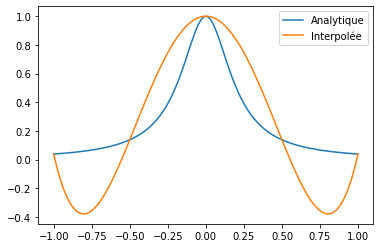

In [53]:
vec_a = np.linalg.inv(mat_vdm) @ vec_yi # Calculer le vecteur des coefficients a
print(vec_a)

vec_x = np.linspace(-1,1,100)
vec_y_analytique = fn(vec_x)
vec_y_interp = np.zeros(100)
for i in range(vec_a.size):
    vec_y_interp += vec_a[i]*vec_x**i

plt.plot(vec_x, vec_y_analytique, label='Analytique')
plt.plot(vec_x, vec_y_interp, label='Interpolée')
plt.legend()
plt.show()

### Astuces


- Utiliser .shape() pour troubleshoot
- prioriser les operations directement sur la matrice entière plutot que par éléments

<center><h2> Exemple 3 - Smith Hutton </h2></center>

### Contexte

- np.solve
- fonctions plus avancées
- np.hstack
- discretisation spatiale 
- exemple 2D style smith hutton

astuces:
vérifier la documentation pour les sorties, entrées des fonctions et autres paramètres utiles (ex: axis)